<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-LCC/blob/main/Notebooks/06-Vectores_sem%C3%A1nticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Semántica Vectorial</h1>

En esta notebook usaremos dos módelos de semántica vectorial para diversas tareas de NLP. Los modelos que usaremos son:

* Bag of Words (BoW). [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
* Term Frequency - Inverse Document Frequency (TF-IDF). [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

Usando estos dos modelos realicermos tareas como:

* Vecinos más cercanos
* Information Retrieval
* Segmentación
* Clasificación


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Ejemplo 1: Detección de SPAM

## Leer el corpus

In [ ]:
!gdown 1-pMLSTkJ3ZPCKQU8oXA3uI-swvXw7DmJ

Downloading...
From: https://drive.google.com/uc?id=1-pMLSTkJ3ZPCKQU8oXA3uI-swvXw7DmJ
To: /content/Spam_SMS.csv
100% 487k/487k [00:00<00:00, 19.9MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('Spam_SMS.csv')
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
for idx in df.sample(10).index.to_list():
    print(df.loc[idx,'Message'],end='\n'+50*'.'+'\n')

Sorry, I'll call later
..................................................
Neshanth..tel me who r u?
..................................................
Oic cos me n my sis got no lunch today my dad went out... So dunno whether 2 eat in sch or wat...
..................................................
We are pleased to inform that your application for Airtel Broadband is processed successfully. Your installation will happen within 3 days.
..................................................
Happy new year to u and ur family...may this new year bring happiness , stability and tranquility to ur vibrant colourful life:):)
..................................................
Not thought bout it... || Drink in tap & spile at seven. || Is that pub on gas st off broad st by canal. || Ok?
..................................................
Oi when you gonna ring
..................................................
I am getting threats from your sales executive Shifad as i raised complaint against him. I

## Limpieza del texto

In [ ]:
import re

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\d+', ' ', texto)
    return texto

df['texto limpio'] = df['Message'].apply(limpiar_texto)
df

,Class,Message,texto limpio
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u...
5570,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home
5571,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5572,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Class'].values)
print(y[:5])

docs = df['texto limpio'].values

[0 0 1 0 0]


Porcentaje de la clase minoritaria: 0.134


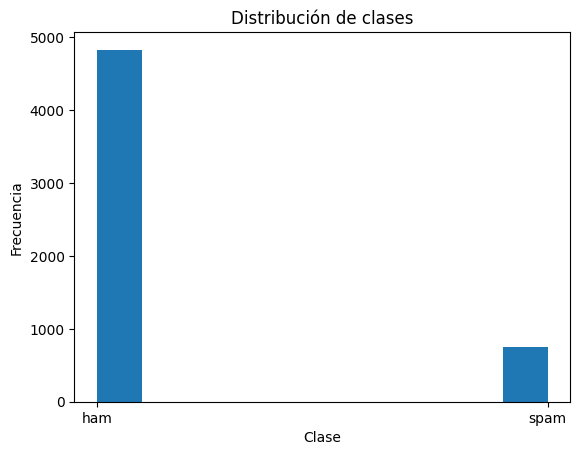

In [ ]:
pct = y[y==1].shape[0]/y.shape[0]
print(f"Porcentaje de la clase minoritaria: {round(pct,3)}")

plt.figure()
plt.hist(y)
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(range(len(le.classes_)),le.classes_)
plt.show()

## División train/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(docs, y,
                                                    test_size=0.2,
                                                    random_state=12)

## Extracción de variables (vectorización)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

cv = CountVectorizer(stop_words=stopwords)
cv.fit(X_train)

X_train_bow = cv.transform(X_train).todense()
X_train_bow = np.array(X_train_bow)
X_test_bow = cv.transform(X_test).todense()
X_test_bow = np.array(X_test_bow)

Observa las dimensiones de las matrices BOW

In [ ]:
X_train_bow.shape, X_test_bow.shape

((4459, 7355), (1115, 7355))

Veamos la proporción de ceros

In [ ]:
number_of_zero_entries = np.count_nonzero(X_train_bow == 0)
number_of_entries = X_train_bow.shape[0] * X_train_bow.shape[1]

print(f"Porcentaje de entradas cero: {number_of_zero_entries/number_of_entries}")

Porcentaje de entradas cero: 0.9988902896379416


Interpretabilidad de las variables

In [ ]:
cv.vocabulary_

## Entrenamiento e inferencia

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_bow, y_train)

y_pred_train = svm.predict(X_train_bow)
y_pred_test = svm.predict(X_test_bow)

## Evaluación

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
print(f"F1 train: {f1_score(y_train, y_pred_train)}")
print(f"F1 test: {f1_score(y_test, y_pred_test)}")
print(f"Matriz de confusión:\n{confusion_matrix(y_test, y_pred_test)}")

Accuracy train: 0.9993272034088361
Accuracy test: 0.9838565022421525
F1 train: 0.9975103734439834
F1 test: 0.9343065693430657
Matriz de confusión:
[[969   3]
 [ 15 128]]


## Acerca de la interpretabilidad

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train_bow, y_train)

y_pred_train = dt.predict(X_train_bow)
y_pred_test = dt.predict(X_test_bow)

print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
print(f"F1 train: {f1_score(y_train, y_pred_train)}")
print(f"F1 test: {f1_score(y_test, y_pred_test)}")
print(f"Matriz de confusión:\n{confusion_matrix(y_test, y_pred_test)}")

Accuracy train: 0.9854227405247813
Accuracy test: 0.9704035874439462
F1 train: 0.9431321084864392
F1 test: 0.8764044943820225
Matriz de confusión:
[[965   7]
 [ 26 117]]


Obtenemos las palabras con las importancias más altas para la clasificación de la clase positiva (spam)

In [ ]:
most_important_words_idxs = np.argsort(dt.feature_importances_)[::-1]
most_important_words = [cv.get_feature_names_out()[idx] for idx in most_important_words_idxs]

In [ ]:
most_important_words[:10]

['call',
 'txt',
 'free',
 'reply',
 'text',
 'ill',
 'claim',
 'pmsg',
 'im',
 'mobile']

# Ejemplo 2: Topic Modeling

In [ ]:
from nltk import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

Ahora probemos con otro corpus. Es una parte de un dump de wikipedia del 2006 ([información](https://www.cs.upc.edu/~nlp/wikicorpus/)).

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/gmauricio-toledo/NLP-MCD/main/data/spanish-wikipedia-dataframe.csv"
df = pd.read_csv(url,index_col=0)
df

Preprocesamos y limpiamos el texto.

⭕ ¿Qué estamos haciendo al texto?

In [ ]:
docs_raw = df['Texto'].tolist()
docs = [re.sub(r'\d+', ' ', doc) for doc in docs_raw]
tokenized_docs = [word_tokenize(doc) for doc in docs]
docs = [[token for token in doc if token not in nltk.corpus.stopwords.words('spanish')] for doc in tokenized_docs]
docs = [' '.join(doc) for doc in docs]
docs[:3]

## Modelo BOW

Observa cómo especificamos la lista de stopwords en español.

In [ ]:
stop_words = nltk.corpus.stopwords.words('spanish')

cv = CountVectorizer(stop_words=stop_words, max_features=1000)
X_bow = cv.fit_transform(docs)
X_bow.shape

In [ ]:
X_bow[:3,:7].todense()

In [ ]:
X_bow[140:143,750:756].todense()

¿Qué tan *sparse* es la matriz?

In [ ]:
num_ceros = np.where(X_bow.toarray()==0)[0].shape[0]
total_entradas = (X_bow.toarray().shape[0]*X_bow.toarray().shape[1])

print(f"Número de entradas: {total_entradas}")
print(f"Proporción de entradas cero: {round(100*num_ceros/total_entradas,2)} %")

In [ ]:
vocabulary = cv.get_feature_names_out()

Representaciones de documentos

In [ ]:
doc_vectors = X_bow.toarray()

### Clustering: Topic Modelling

Clustericemos los documentos. Usemos un método basado en densidad, en lugar de uno de partición.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=3, metric='cosine')
dbscan.fit(doc_vectors)
num_doc_clusters = np.max(dbscan.labels_)+1
print(f"Hay {num_doc_clusters} clusters")

In [ ]:
!pip install -qq wordcloud

In [ ]:
#@title función para factorizar
import math

def factor_int(n):
    val = math.ceil(math.sqrt(n))
    val2 = int(n/val)
    while val2 * val != float(n):
        val -= 1
        val2 = int(n/val)
    return val, val2

Exploremos los términos más frecuentes en cada cluster.

In [ ]:
from wordcloud import WordCloud

idxs_per_cluster = {j: np.where(dbscan.labels_==j)[0] for j in range(num_doc_clusters)}
docs_per_cluster = {j: [docs[idx] for idx in idxs_per_cluster[j]] for j in idxs_per_cluster.keys()}

wc = WordCloud(background_color="white", max_words=1000)

w, h = factor_int(num_doc_clusters)
fig, axs = plt.subplots(w, h, figsize=(6*w, 3*h))

for j,ax in zip(idxs_per_cluster.keys(),axs.flatten()):
    wc.generate(' '.join(docs_per_cluster[j]))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Cluster {j}")
fig.tight_layout()
fig.show()

## Vectores de palabras

Ahora veamos las palabras:

In [ ]:
def get_word_vector(word):
    idx = np.where(vocabulary==word)[0][0]
    return X_bow[:, idx].toarray().flatten()

In [ ]:
word_vectors = [get_word_vector(word) for word in vocabulary]
word_vectors = np.array(word_vectors)
word_vectors.shape

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine')
nn.fit(word_vectors)

Probemos los vecinos más cercanos de las palabras: cine, equipo, guerra, música, mayores

In [ ]:
word = 'guerra'
v = get_word_vector(word)
nns = nn.kneighbors([v])
print(f"Vecinos más cercanos: {[vocabulary[idx] for idx in nns[1][0]]}")
print(f"Distancias: {[round(sim,3) for sim in nns[0][0]]}")

In [ ]:
#@title Grafiquemos la reducción de dimensionalidad 3d t-SNE

tsne = TSNE(n_components=3, metric='cosine')
X_tsne = tsne.fit_transform(word_vectors)

plotly.offline.init_notebook_mode()

trace = go.Scatter3d(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    z=X_tsne[:,2],
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.75,
        'color': 'black'
    },
    hovertemplate='%{text}<extra></extra>',
    text = [f"{vocabulary[j]}" for j in range(X_tsne.shape[0])]
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(
    title = 'Wikipedia Words',
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )

plotly.offline.plot(plot_figure, filename='wiki-bow-tsne3d-words.html')

In [ ]:
!pip install -qq umap-learn

import umap

### Clustering

Analicemos algunos clusters de palabras

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
kmeans.fit(word_vectors)

In [ ]:
for j in range(n_clusters):
    print(f"Cluster {j}:")
    print([vocabulary[idx] for idx in np.where(kmeans.labels_==j)[0]])

Analicemos los casos de *familia*, *campeón*

In [ ]:
word = 'campeón'
v = get_word_vector(word)
nns = nn.kneighbors([v])
print(f"Vecinos más cercanos: {[vocabulary[idx] for idx in nns[1][0]]}")
print(f"Distancias: {[round(sim,3) for sim in nns[0][0]]}")

⭕ ¿Por qué tenemos estos resultados que no corresponden a la gráfica?

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine',linkage='average')
agglom.fit(word_vectors)

In [ ]:
for j in range(n_clusters):
    print(f"Cluster {j}:")
    print([vocabulary[idx] for idx in np.where(agglom.labels_==j)[0]])

In [ ]:
word = 'abril'
v = get_word_vector(word)
nns = nn.kneighbors([v])
print(f"Vecinos más cercanos: {[vocabulary[idx] for idx in nns[1][0]]}")
print(f"Distancias: {[round(sim,3) for sim in nns[0][0]]}")

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=2, metric='cosine')
dbscan.fit(word_vectors)

In [ ]:
for j in np.unique(dbscan.labels_):
    print(f"Cluster {j}:")
    print([vocabulary[idx] for idx in np.where(dbscan.labels_==j)[0]])

## Modelo TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = nltk.corpus.stopwords.words('spanish')

tfv = TfidfVectorizer(stop_words=stop_words, max_features=1000)
X_tfidf = tfv.fit_transform(docs)
print(X_tfidf.shape)

Ver la matriz, ¿es más sparse? Tenía el 94.78% de entradas en 0

In [ ]:
tota_entradas = X_tfidf.shape[0]*X_tfidf.shape[1]
num_ceros = np.where(X_tfidf.toarray()==0)[0].shape[0]

print(f"Número de entradas: {total_entradas}")
print(f"Proporción de entradas cero: {round(100*num_ceros/total_entradas,2)} %")

### Clustering

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=3, metric='cosine')
dbscan.fit(doc_vectors)
num_doc_clusters = np.max(dbscan.labels_)+1
print(f"Hay {num_doc_clusters} clusters")

idxs_per_cluster = {j: np.where(dbscan.labels_==j)[0] for j in range(num_doc_clusters)}
docs_per_cluster = {j: [docs[idx] for idx in idxs_per_cluster[j]] for j in idxs_per_cluster.keys()}

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)

w, h = factor_int(num_doc_clusters)
fig, axs = plt.subplots(w, h, figsize=(6*w, 3*h))

for j,ax in zip(idxs_per_cluster.keys(),axs.flatten()):
    wc.generate(' '.join(docs_per_cluster[j]))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Cluster {j}")
fig.tight_layout()
fig.show()

# Ejemplo 3: Information Retrieval

In [55]:
!gdown 1SXH1pwWV1-M32yyJ8PUYGi5W3N1G3oBz

Downloading...
From: https://drive.google.com/uc?id=1SXH1pwWV1-M32yyJ8PUYGi5W3N1G3oBz
To: /content/all_top_rated_movies_from_TMDB.csv
100% 3.24M/3.24M [00:00<00:00, 106MB/s]


In [56]:
import pandas as pd

df = pd.read_csv('/content/all_top_rated_movies_from_TMDB.csv')
df = df[['original_title','overview']].copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,original_title,overview
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
2,The Godfather Part II,In the continuing saga of the Corleone crime f...
3,Schindler's List,The true story of how businessman Oskar Schind...
4,12 Angry Men,The defense and the prosecution have rested an...
...,...,...
9774,Vehicle 19,A parolee becomes the target of a massive poli...
9775,Contracted,A young woman contracts what she believes to b...
9776,Dos,"Two people, a man and a woman, wake up naked a..."
9777,Teeth,Dawn is an active member of her high-school ch...


In [58]:
for idx in df.sample(10).index.to_list():
    print(df.loc[idx,'overview'])
    print(50*"-")

Shrek challenges Donkey, Puss in Boots and his other fairy tale character friends to spend the night in Lord Farquaad's haunted castle, telling scary stories to see who can resist becoming scared and stay the longest.
--------------------------------------------------
Violinist Sydney Wells was accidentally blinded by her sister Helen when she was five years old. She submits to a cornea transplantation, and while recovering from the operation, she realizes that she is seeing dead people.
--------------------------------------------------
When Betty Anne Waters' older brother Kenny is arrested for murder and sentenced to life in 1983, Betty Anne, a Massachusetts wife and mother of two, dedicates her life to overturning the murder conviction. Convinced that her brother is innocent, Betty Anne puts herself through high school, college and, finally, law school in an 18 year quest to free Kenny. With the help of best friend Abra Rice, Betty Anne pores through suspicious evidence mounted by 

In [59]:
docs = df['overview'].to_list()
titles = df['original_title'].to_list()
len(docs)

9779

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizador = CountVectorizer(stop_words='english',
                               max_features=2000
                               )
X = vectorizador.fit_transform(docs).toarray()
print(X.shape)

(9779, 2000)


In [61]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, metric='cosine')
nn.fit(X)

NearestNeighbors(metric='cosine')

In [62]:
# query = "movie about relationship and journey"
query = "horror movies with zombies"

query_vector = vectorizador.transform([query]).toarray()
query_vector.shape

(1, 2000)

In [63]:
query_vector

array([[0, 0, 0, ..., 0, 0, 1]])

In [ ]:
vectorizador.vocabulary_

In [68]:
vectorizador.get_feature_names_out()[1999]

'zombies'

In [69]:
num_zeros = np.where(query_vector==0)[0].shape[0]
print(f"Hay {num_zeros} entradas zero de {query_vector.shape[1]}")

Hay 1998 entradas zero de 2000


In [70]:
vecinos = nn.kneighbors(query_vector)
print(vecinos)

(array([[0.46547752, 0.62203553, 0.71132487, 0.73273876, 0.73273876]]), array([[9460, 6103, 9295, 7523, 4709]]))


In [71]:
distancias, idxs = vecinos
for idx in idxs[0]:
    print(docs[idx])
    print(50*"-")

A group of young filmmakers encounter real zombies while filming a horror movie of their own.
--------------------------------------------------
The next great psycho horror slasher has given a documentary crew exclusive access to his life as he plans his reign of terror over the sleepy town of Glen Echo, all the while deconstructing the conventions and archetypes of the horror genre for them.
--------------------------------------------------
A diplomatic couple adopts the son of the devil without knowing it. A remake of the classic horror film of the same name from 1976.
--------------------------------------------------
A young boy tells three stories of horror to distract a witch who plans to eat him.
--------------------------------------------------
A soldier and his team battle hordes of post-apocalyptic zombies in the wastelands of the Korean Peninsula.
--------------------------------------------------


In [ ]:
#@title Grafiquemos la reducción de dimensionalidad 3d t-SNE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

tsne = TSNE(n_components=3, metric='cosine')
X_tsne = tsne.fit_transform(X)

plotly.offline.init_notebook_mode()

trace = go.Scatter3d(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    z=X_tsne[:,2],
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.75,
        'color': 'black'
    },
    hovertemplate='%{text}<extra></extra>',
    text = [f"{titles[j]}" for j in range(X_tsne.shape[0])]
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(
    title = 'Wikipedia Docs',
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )

plotly.offline.plot(plot_figure, filename='imdbmovies-bow-tsne3d-docs.html')